## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey.

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high.

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

Load the EdGap
 data set

In [2]:
edgap = pd.read_excel('https://github.com/galenegan/DATA-3320/raw/main/education/EdGap_data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load the school information data

In [3]:
!wget -O school_info.csv https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP&export=download

--2024-04-23 04:30:12--  https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.8.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-04-23 04:30:13--  https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-04-23 04:30:13--  https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting 

In [4]:
school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape')

<ipython-input-4-9aca6f144c98>:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape')


## Explore the contents of the data sets

In [5]:
edgap.tail(5)

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.5,0.232156
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.3,0.083871
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.5,0.184829
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.7,0.112583
7985,560583000335,0.033553,0.736511,0.821128,73849.0,21.8,0.163701


In [6]:
school_info.head(5)

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


## Convert data types, if necessary

Below is the code used to check the data types of each column for each data set using the .dtypes function

In [7]:
school_info.dtypes

SCHOOL_YEAR     object
FIPST            int64
STATENAME       object
ST              object
SCH_NAME        object
                 ...  
G_AE_OFFERED    object
GSLO            object
GSHI            object
LEVEL           object
IGOFFERED       object
Length: 65, dtype: object

In [8]:
edgap.dtypes

NCESSCH School ID                                    int64
CT Unemployment Rate                               float64
CT Pct Adults with College Degree                  float64
CT Pct Childre In Married Couple Family            float64
CT Median Household Income                         float64
School ACT average (or equivalent if SAT score)    float64
School Pct Free and Reduced Lunch                  float64
dtype: object

Below is the code used to fix the data types for school information and then checking to verify that those changes were made.

In [9]:
school_info = school_info[school_info['NCESSCH'].isna() == False]

In [10]:
school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')

<ipython-input-10-006ea9997674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')


In [11]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102181 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102181 non-null  object 
 1   FIPST                102181 non-null  int64  
 2   STATENAME            102181 non-null  object 
 3   ST                   102181 non-null  object 
 4   SCH_NAME             102181 non-null  object 
 5   LEA_NAME             102181 non-null  object 
 6   STATE_AGENCY_NO      102181 non-null  object 
 7   UNION                2531 non-null    float64
 8   ST_LEAID             102181 non-null  object 
 9   LEAID                102181 non-null  object 
 10  ST_SCHID             102181 non-null  object 
 11  NCESSCH              102181 non-null  int64  
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3             2

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Below is the code used to create plot graphs to see if there is any correlations between our two sets of data and their variables to make sure the data is worth invesitgating.

In [12]:
edgap.columns

Index(['NCESSCH School ID', 'CT Unemployment Rate',
       'CT Pct Adults with College Degree',
       'CT Pct Childre In Married Couple Family', 'CT Median Household Income',
       'School ACT average (or equivalent if SAT score)',
       'School Pct Free and Reduced Lunch'],
      dtype='object')

In [13]:
edgap = edgap.loc[edgap["School ACT average (or equivalent if SAT score)"] > 5]

<Figure size 1000x1000 with 0 Axes>

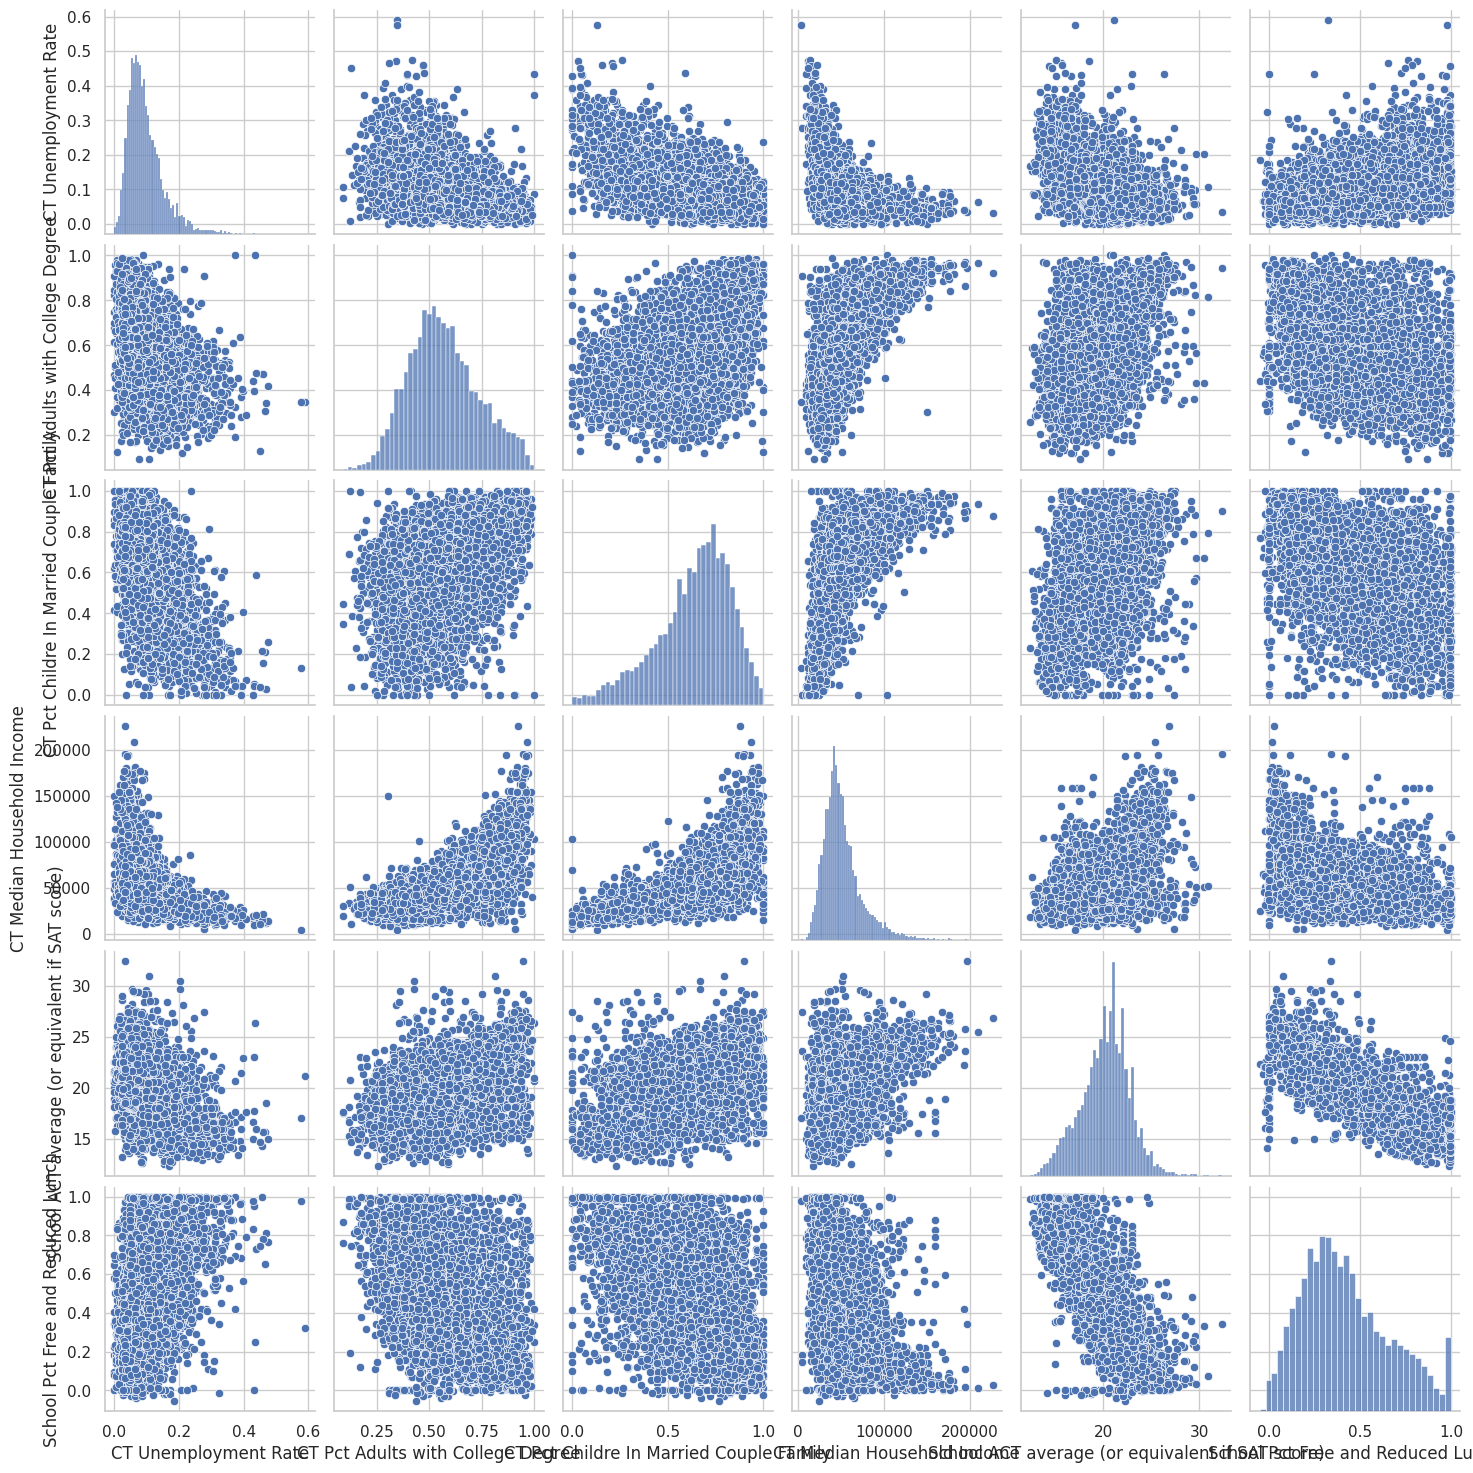

In [14]:
fig = plt.figure()
sns.pairplot(edgap.drop(columns = 'NCESSCH School ID'))
fig.set_size_inches(10, 10)

Above shows that there is a relationship between socioeconmic facotrs and ACT scores so we will investigate it.

## Select relevant subsets of the data

The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

Keep the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL`

Below is the code used to choose only the mentioned columns for our education data in the school info dataset.

In [15]:
good_cols = ["SCHOOL_YEAR", "NCESSCH", "MSTATE", "MZIP", "SCH_TYPE_TEXT", "LEVEL"]
school_info = school_info.loc[:,good_cols]
school_info

,SCHOOL_YEAR,NCESSCH,MSTATE,MZIP,SCH_TYPE_TEXT,LEVEL
0,2016-2017,10000200277,AL,35220,Alternative School,High
1,2016-2017,10000201667,AL,36057,Alternative School,High
2,2016-2017,10000201670,AL,36057,Alternative School,High
3,2016-2017,10000201705,AL,36057,Alternative School,High
4,2016-2017,10000201706,AL,35206,Alternative School,High
...,...,...,...,...,...,...
102178,2016-2017,780003000025,VI,802,Regular School,Elementary
102179,2016-2017,780003000026,VI,802,Regular School,Elementary
102180,2016-2017,780003000027,VI,802,Regular School,Elementary
102181,2016-2017,780003000033,VI,802,Regular School,Middle


## Rename columns

Below is the code used to rename our column to more code friendly and understandable names.

In [16]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id",
              "CT Pct Adults with College Degree":"percent_college",
              "CT Unemployment Rate":"rate_unemployment",
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

In [17]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year',
                                          'NCESSCH':'id',
                                          'MSTATE':'state',
                                          'MZIP':'zip_code',
                                          'SCH_TYPE_TEXT':'school_type',
                                          'LEVEL':'school_level'})

In [18]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [19]:
school_info.head()

,year,id,state,zip_code,school_type,school_level
0,2016-2017,10000200277,AL,35220,Alternative School,High
1,2016-2017,10000201667,AL,36057,Alternative School,High
2,2016-2017,10000201670,AL,36057,Alternative School,High
3,2016-2017,10000201705,AL,36057,Alternative School,High
4,2016-2017,10000201706,AL,35206,Alternative School,High


## Join data frames

Below is the code used to join the data frames together so we are working with one dataset.

In [20]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7983 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7983 non-null   int64  
 1   rate_unemployment  7969 non-null   float64
 2   percent_college    7970 non-null   float64
 3   percent_married    7958 non-null   float64
 4   median_income      7963 non-null   float64
 5   average_act        7983 non-null   float64
 6   percent_lunch      7983 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 498.9 KB


In [21]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102181 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  int64 
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  object
 4   school_type   102179 non-null  object
 5   school_level  102179 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.5+ MB


In [22]:
df = edgap.merge(school_info, how = 'left', on='id')

In [23]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7983 non-null   int64  
 1   rate_unemployment  7969 non-null   float64
 2   percent_college    7970 non-null   float64
 3   percent_married    7958 non-null   float64
 4   median_income      7963 non-null   float64
 5   average_act        7983 non-null   float64
 6   percent_lunch      7983 non-null   float64
 7   year               7895 non-null   object 
 8   state              7895 non-null   object 
 9   zip_code           7895 non-null   object 
 10  school_type        7895 non-null   object 
 11  school_level       7895 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 748.5+ KB


## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

Below is the code I used to check null values

In [25]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102181 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  int64 
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  object
 4   school_type   102179 non-null  object
 5   school_level  102179 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.5+ MB


## Identify missing values

Determine whether there are missing values in the data set. Only identify them at this point; we will deal with them after creating training and testing splits of the data set.

Below is the code used to count the total number of null values in each column without removing them yet.

In [26]:
nullvalues= df.isnull().sum()
nullvalues

id                    0
rate_unemployment    14
percent_college      13
percent_married      25
median_income        20
average_act           0
percent_lunch         0
year                 88
state                88
zip_code             88
school_type          88
school_level         88
dtype: int64

## Train test split

We will use the test set approach to compare models predicting `average_act`.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

Split the data into training and testing sets. Keep 20% of the data for the test set.

The code below makes dataset for machine learning. It splits the data into training and testing sets, with 80% for training and 20% for testing. It then scales the features and normalizes them.

In [27]:
keep_cols = ["id","rate_unemployment","percent_college","percent_married","median_income","average_act", "percent_lunch"]
df = df[keep_cols]
df = df.dropna()

features = [col for col in keep_cols if col != "average_act "]
target = ["average_act"]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7958 entries, 0 to 7982
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7958 non-null   int64  
 1   rate_unemployment  7958 non-null   float64
 2   percent_college    7958 non-null   float64
 3   percent_married    7958 non-null   float64
 4   median_income      7958 non-null   float64
 5   average_act        7958 non-null   float64
 6   percent_lunch      7958 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 497.4 KB


## Data imputation

Use an imputation method to replace missing values in the columns corresponding to predictor variables in the analysis.

The code below uses imperative imputation to replace the missing values based on what the machine learning estimated.

In [37]:
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X)

In [38]:
df

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641
...,...,...,...,...,...,...,...
7978,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156
7979,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871
7980,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829
7981,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583


## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. Or, we might not create any new columns. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv files

Export files with the training and testing data

In [41]:
df.to_csv('SM_Education_Inequality_Data_Preparation.csv',index=False)